<a href="https://colab.research.google.com/github/javier-jaime/Stock_Price_Forecasting/blob/main/Update3_BTC_Price_Forecasting_with_yfinance_and_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bitcoin Price Forecasting with yfinance and Facebook Prophet**

## Importing all the necessary Libraries

In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px
from fbprophet import Prophet
import plotly.io as pio
pio.renderers.default='colab'

     |████████████████████████████████| 6.3 MB 859 kB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=36307ef98c85853f2bf5288ed6ffb6b1d9aaf20d82f447ec8e324f32247f9137
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


## Importing the Dataset & Exploring it

In [26]:
# Stock Ticker Input
stock = input('Enter the stock ticker: ')
print(f'You entered {stock}, here is the data from the last 10 days:')
period = '3y'
ticker = yf.Ticker(stock)
data = ticker.history(period)
data.reset_index(inplace=True)
data.tail(10)

Enter the stock ticker: BTC-USD
You entered BTC-USD, here is the data from the last 10 days:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1083,2021-10-18,61548.804688,62614.660156,60012.757812,62026.078125,38055562075,0,0
1084,2021-10-19,62043.164062,64434.535156,61622.933594,64261.992188,40471196346,0,0
1085,2021-10-20,64284.585938,66930.390625,63610.675781,65992.835938,40788955582,0,0
1086,2021-10-21,66002.234375,66600.546875,62117.410156,62210.171875,45908121370,0,0
1087,2021-10-22,62237.890625,63715.023438,60122.796875,60692.265625,38434082775,0,0
1088,2021-10-23,60694.628906,61743.878906,59826.523438,61393.617188,26882546034,0,0
1089,2021-10-24,61368.343750,61505.804688,59643.343750,60930.835938,27316183882,0,0
1090,2021-10-25,60893.925781,63729.324219,60691.800781,63039.824219,31064911614,0,0
1091,2021-10-26,63032.761719,63229.027344,59991.160156,60363.792969,34878965587,0,0
1092,2021-10-27,60260.234375,61435.183594,58377.277344,58830.824219,43968704512,0,0


In [27]:
print('These are the basic stats:')
data.describe()

These are the basic stats:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1093.000000,1093.000000,1093.000000,1093.000000,1.093000e+03,1093.0,1093.0
mean,18944.675221,19471.891856,18384.923673,18991.102552,3.026497e+10,0.0,0.0
std,17511.812326,18046.115953,16917.516840,17548.565515,2.139664e+10,0.0,0.0
min,3236.274658,3275.377930,3191.303467,3236.761719,3.393250e+09,0.0,0.0
25%,7398.633789,7544.497070,7267.962891,7410.656738,1.668150e+10,0.0,0.0
50%,9887.730469,10144.556641,9678.910156,9900.767578,2.592029e+10,0.0,0.0
75%,32985.757812,34209.070312,31639.125000,33005.761719,3.952779e+10,0.0,0.0
max,66002.234375,66930.390625,63610.675781,65992.835938,3.509679e+11,0.0,0.0


# Data Visualization (plotly express) - Visualizing the historical performance

In [28]:
#Line graph (Price), Area graph (Volume) , box plot (Analyzing price and volume)

In [29]:
px.line(data, x="Date", y="Close", title=f'{stock} Stock Close Price')

In [30]:
px.bar(data, x="Date", y="Volume", title=f'{stock} Stock Volume')

In [31]:
px.box(data, y="Close", title=f'{stock} box plot', height=500, width=500)

In [32]:
def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    lags = range(2, max_lag)
    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]
    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)
    return reg[0]

In [33]:
hurst = []
lags = range(8, 81, 4)
for lag in lags:
    hurst_exp = get_hurst_exponent(data["Close"].values, lag)
    hurst.append(hurst_exp)
px.line(hurst, x=lags, y=hurst, title=f'{stock} Hurst Exp')

## Data Preparation for Facebook Prophet

In [34]:
columns=['Date','Close']
prophet_df=pd.DataFrame(data,columns=columns)
prophet_df= prophet_df.rename(columns={'Date':'ds','Close':'y'})  
prophet_df.tail()

,ds,y
1088,2021-10-23,61393.617188
1089,2021-10-24,60930.835938
1090,2021-10-25,63039.824219
1091,2021-10-26,60363.792969
1092,2021-10-27,58830.824219


## Creating Facebook Prophet Model

In [35]:
m=Prophet(daily_seasonality=True)
m.fit(prophet_df)

##Forecasting

In [54]:
periods = 30
future=m.make_future_dataframe(periods)

In [55]:
forecast=m.predict(future)

In [56]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-10-27,6424.498695,2876.510281,12729.769049,6424.498695,6424.498695,1412.374534,1412.374534,1412.374534,-38.724002,-38.724002,-38.724002,21.580847,21.580847,21.580847,1429.517689,1429.517689,1429.517689,0.0,0.0,0.0,7836.873228
1,2018-10-28,6375.812908,2227.449089,12312.615813,6375.812908,6375.812908,1128.222568,1128.222568,1128.222568,-38.724002,-38.724002,-38.724002,-20.321064,-20.321064,-20.321064,1187.267633,1187.267633,1187.267633,0.0,0.0,0.0,7504.035476
2,2018-10-29,6327.127121,2136.196335,12480.549198,6327.127121,6327.127121,915.426052,915.426052,915.426052,-38.724002,-38.724002,-38.724002,24.756694,24.756694,24.756694,929.393360,929.393360,929.393360,0.0,0.0,0.0,7242.553174
3,2018-10-30,6278.441335,1911.427468,11451.477995,6278.441335,6278.441335,572.648802,572.648802,572.648802,-38.724002,-38.724002,-38.724002,-49.645517,-49.645517,-49.645517,661.018320,661.018320,661.018320,0.0,0.0,0.0,6851.090136
4,2018-10-31,6229.755548,1540.642556,11605.951675,6229.755548,6229.755548,387.797081,387.797081,387.797081,-38.724002,-38.724002,-38.724002,39.186378,39.186378,39.186378,387.334704,387.334704,387.334704,0.0,0.0,0.0,6617.552629
5,2018-11-01,6181.069761,1058.661169,11303.721208,6181.069761,6181.069761,-20.582405,-20.582405,-20.582405,-38.724002,-38.724002,-38.724002,-95.344134,-95.344134,-95.344134,113.485731,113.485731,113.485731,0.0,0.0,0.0,6160.487357
6,2018-11-02,6132.383975,568.717000,10862.105564,6132.383975,6132.383975,-114.487407,-114.487407,-114.487407,-38.724002,-38.724002,-38.724002,79.786796,79.786796,79.786796,-155.550201,-155.550201,-155.550201,0.0,0.0,0.0,6017.896568
7,2018-11-03,6083.698188,181.529597,10661.409713,6083.698188,6083.698188,-432.213843,-432.213843,-432.213843,-38.724002,-38.724002,-38.724002,21.580847,21.580847,21.580847,-415.070688,-415.070688,-415.070688,0.0,0.0,0.0,5651.484345
8,2018-11-04,6035.012401,119.611931,10543.887629,6035.012401,6035.012401,-719.798180,-719.798180,-719.798180,-38.724002,-38.724002,-38.724002,-20.321064,-20.321064,-20.321064,-660.753115,-660.753115,-660.753115,0.0,0.0,0.0,5315.214221
9,2018-11-05,5986.326615,-177.348828,10250.011890,5986.326615,5986.326615,-902.715838,-902.715838,-902.715838,-38.724002,-38.724002,-38.724002,24.756694,24.756694,24.756694,-888.748531,-888.748531,-888.748531,0.0,0.0,0.0,5083.610777


In [57]:
px.line(forecast, x='ds',y='yhat', title=f'{stock} Stock Forecast')

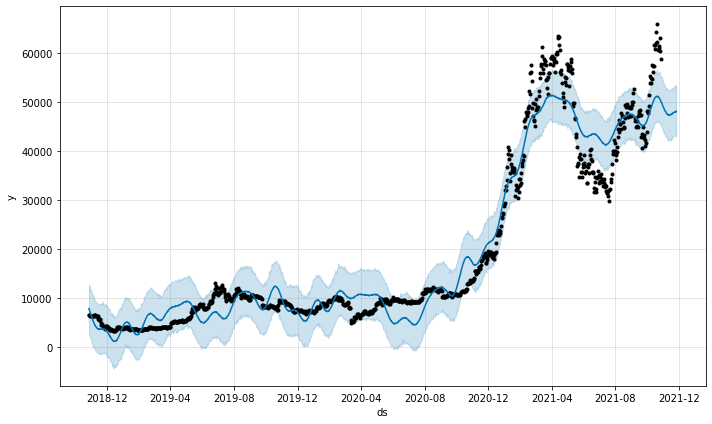

In [58]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

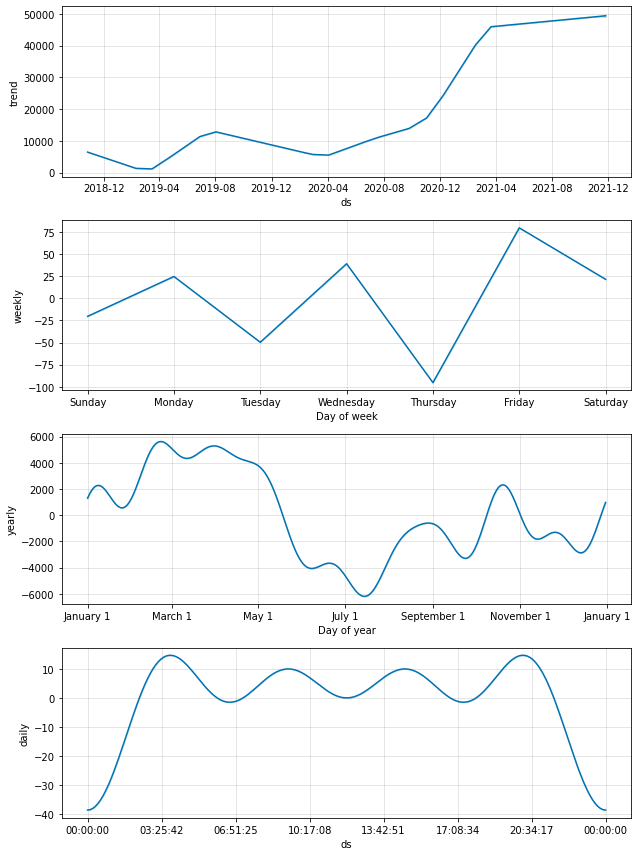

In [59]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv(f'{stock}_forecast.csv')
files.download(f'{stock}_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>